# Validation for incidence data inference

## Test 1

This test involves simulating a trajectory, then comparing parameter posteriors generated from the incidence data with those generated using a tree sampler without sequence data.

For this first test, I assume the removal probability $r=0$: i.e. sampled ancestors are possible.  I therefore use Sasha's SA tree operators to sample tree space.

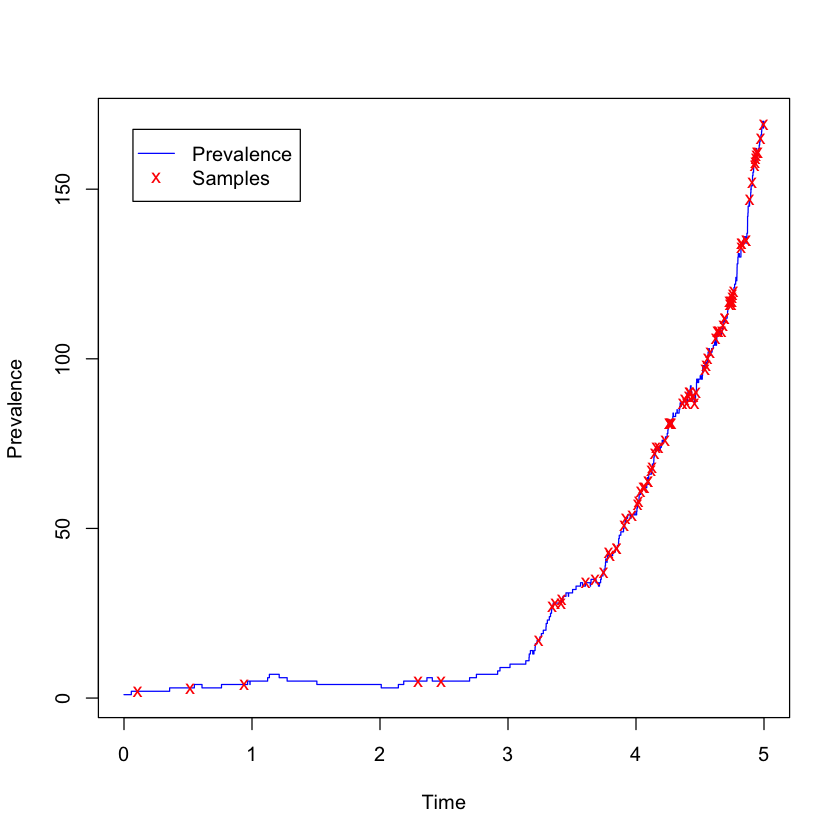

In [1]:
df <- read.table("simulated.traj", header=T)
plot(df$t, df$I, 's', col='blue',
    xlab="Time",
    ylab="Prevalence")
sampIdx <- which(df$eventType=="PSI_SAMPLE_NOREMOVE")
points(df$t[sampIdx], df$I[sampIdx], pch='x', col='red')
legend('topleft', inset=0.05, c("Prevalence", "Samples"),
       lty=c(1,0),
       pch=c('','x'),
       col=c("blue","red"))

Posteriors for $\beta$ should be independent of the sequencing fraction:

In [105]:
require(plyr)
require(ggplot2)

removeBurnin <- function(df, burninFrac=0.1) {
    N <- dim(df)[1]
    return(df[-(1:ceiling(burninFrac*N)),])
}

seqFracs <- seq(0.1,1.0,by=0.1)

dfs <- NULL
for (i in 1:length(seqFracs)) {
    seqFrac <- seqFracs[i]
    seqFracStr <- format(seqFrac, nsmall=1)
    dfs[[i]] <- removeBurnin(read.table(
        paste0("BD_inference.",seqFracStr,".log"), header=T))
    dfs[[i]]$seqFrac <- seqFrac
    dfs[[i]]$SA_treePrior <- FALSE
}

df_treeOnly <- read.table("BD_inference_treeOnly.1.0.log", header=T)
df_treeOnly$seqFrac <- 1.0
df_treeOnly$SA_treePrior <- TRUE

df <- rbind.fill(list(rbind.fill(dfs), df_treeOnly))

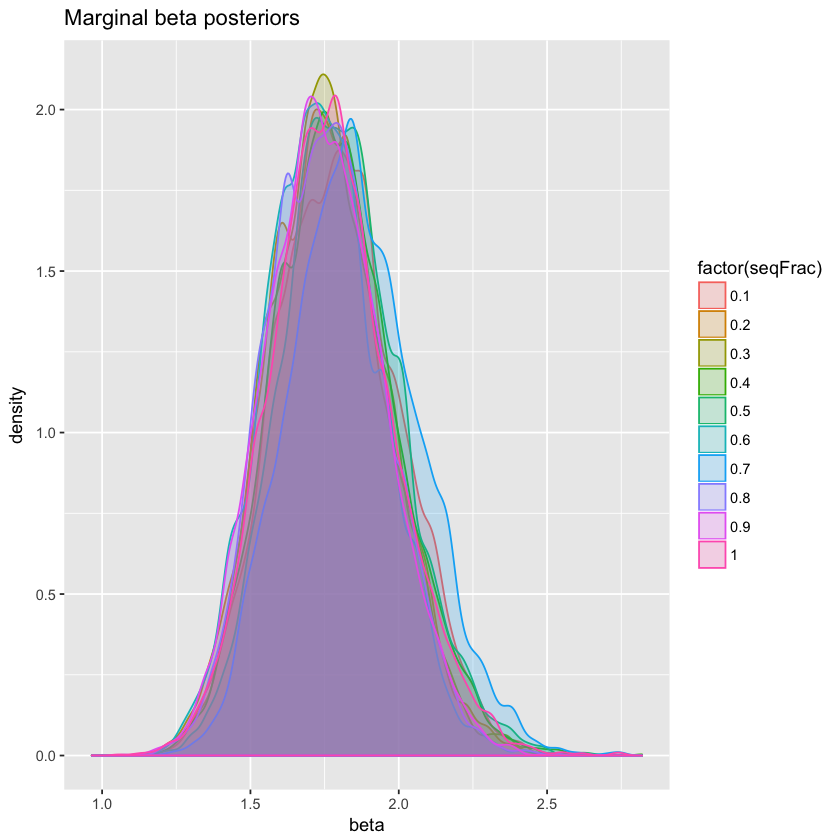

In [107]:
p1 <- ggplot(subset(df, SA_treePrior==FALSE)) +
    geom_density(aes(beta,
                     colour=factor(seqFrac),
                     fill=factor(seqFrac)),
                 alpha=0.2) +
    labs(title="Marginal beta posteriors")
print(p1)

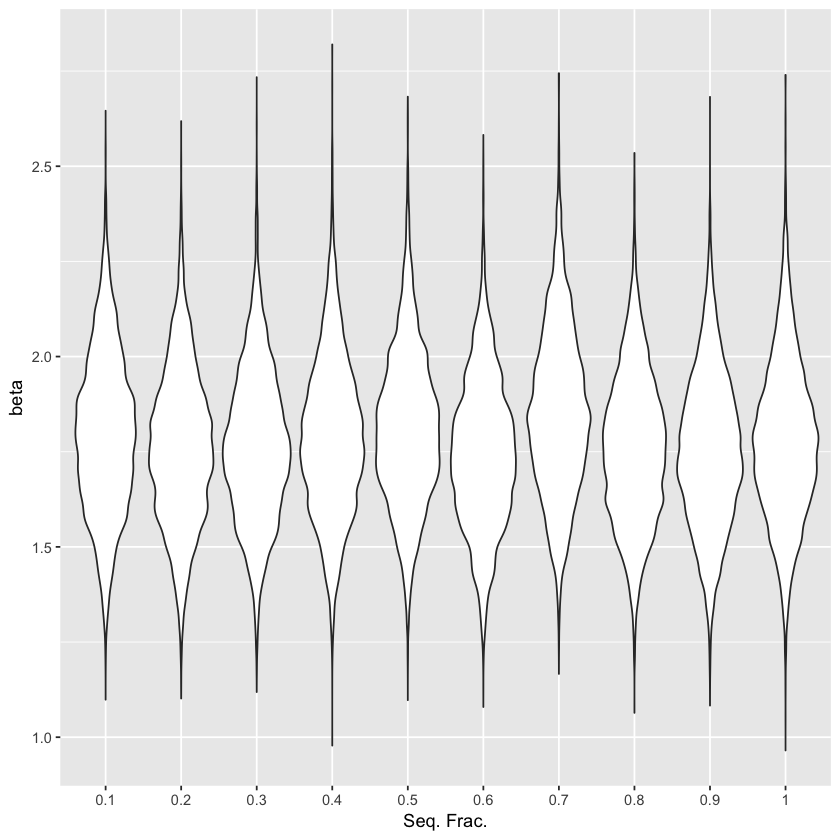

In [108]:
p2 <- ggplot(subset(df, SA_treePrior==FALSE)) + geom_violin(aes(factor(seqFrac), beta)) +
    labs(x="Seq. Frac.")
print(p2)

Saving 7 x 7 in image


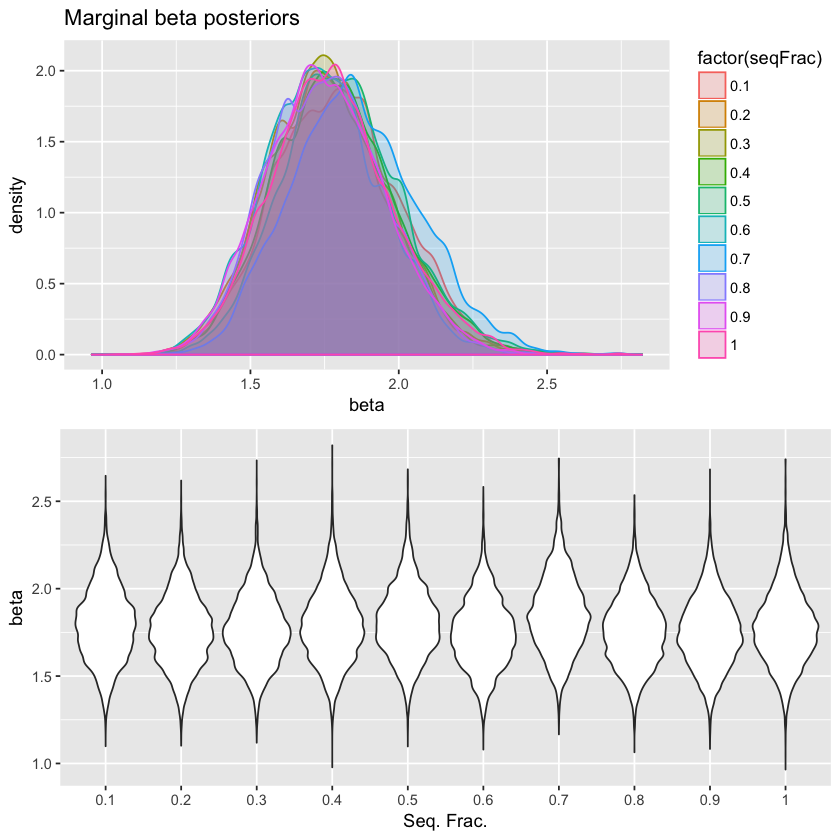

In [109]:
require(gridExtra)
p <- grid.arrange(p1, p2, ncol=1)
ggsave("validation_results.png", p)

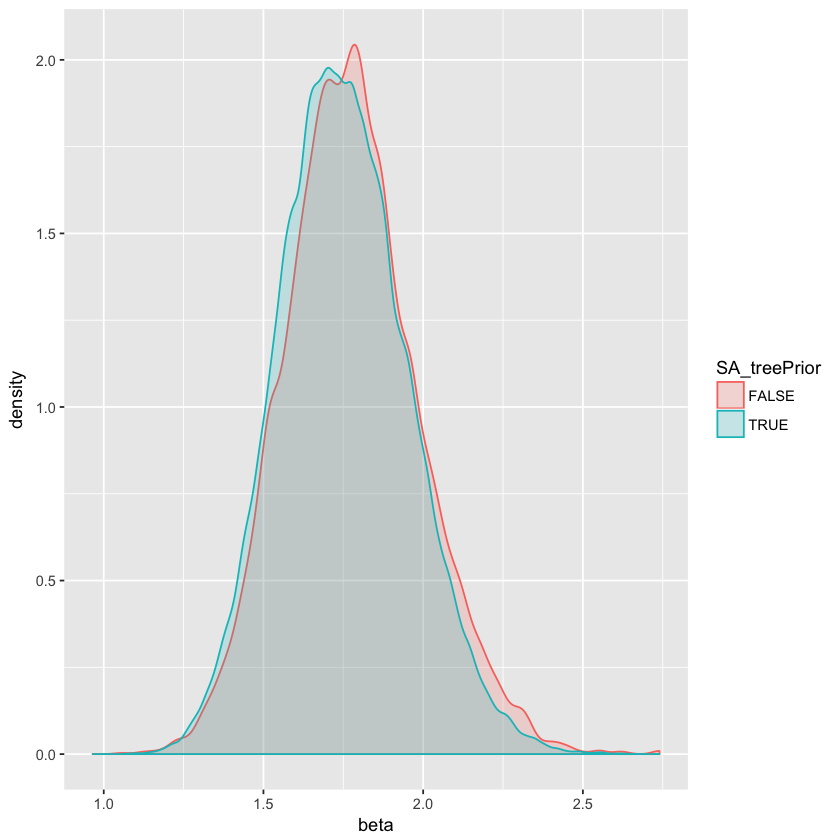

In [110]:
pSA_compare <- ggplot(subset(df, seqFrac==1.0)) +
    geom_density(aes(beta,
                     colour=SA_treePrior,
                     fill=SA_treePrior), alpha=0.2)
print(pSA_compare)
ggsave("validation_results_SA.png", pSA_compare,
    width=6, height=4)

## Test 2

This test is basically the same as the first, but with $\rho$-samples included.  These contemporaneous samples are never included in the unsequenced sample times.

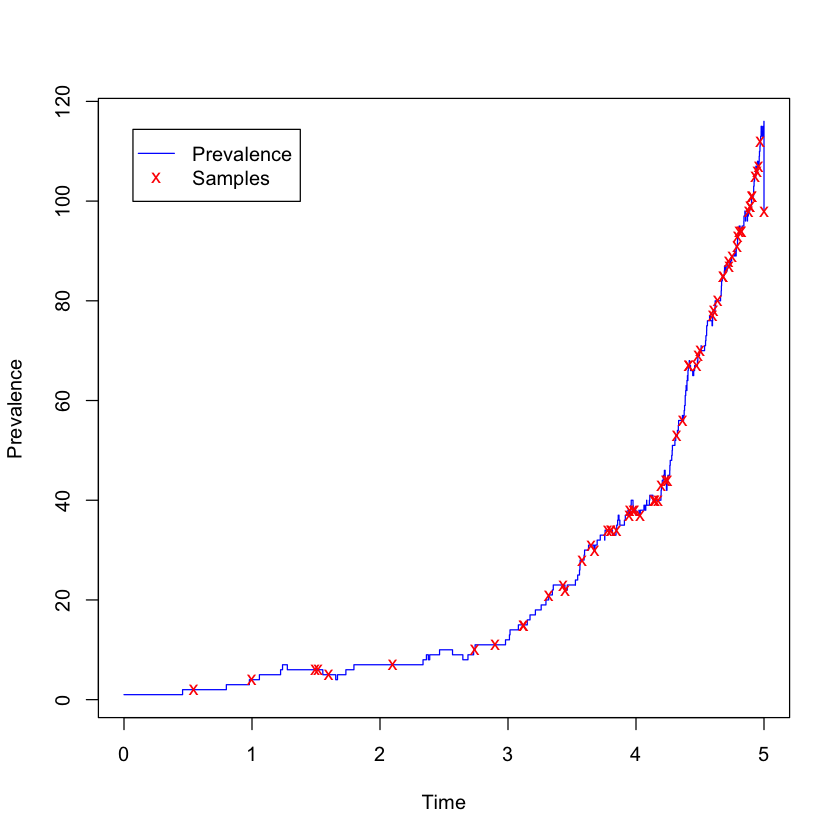

In [38]:
df <- read.table("simulated_rhoSamp.traj", header=T)
plot(df$t, df$I, 's', col='blue',
    xlab="Time",
    ylab="Prevalence")
sampIdx <- which(df$eventType=="PSI_SAMPLE_NOREMOVE" | df$eventType=="RHO_SAMPLE")
points(df$t[sampIdx], df$I[sampIdx], pch='x', col='red')
legend('topleft', inset=0.05, c("Prevalence", "Samples"),
       lty=c(1,0),
       pch=c('','x'),
       col=c("blue","red"))

In [115]:
require(plyr)
require(ggplot2)

removeBurnin <- function(df, burninFrac=0.1) {
    N <- dim(df)[1]
    return(df[-(1:ceiling(burninFrac*N)),])
}

seqFracs <- seq(0.1,1.0,by=0.1)

dfs <- NULL
for (i in 1:length(seqFracs)) {
    seqFrac <- seqFracs[i]
    seqFracStr <- format(seqFrac, nsmall=1)
    dfs[[i]] <- removeBurnin(read.table(
        paste0("BD_inference_rhoSamp.",seqFracStr,".log"), header=T))
    dfs[[i]]$seqFrac <- seqFrac
    dfs[[i]]$SA_treePrior <- FALSE
}


df_rhoSamp <- rbind.fill(dfs)

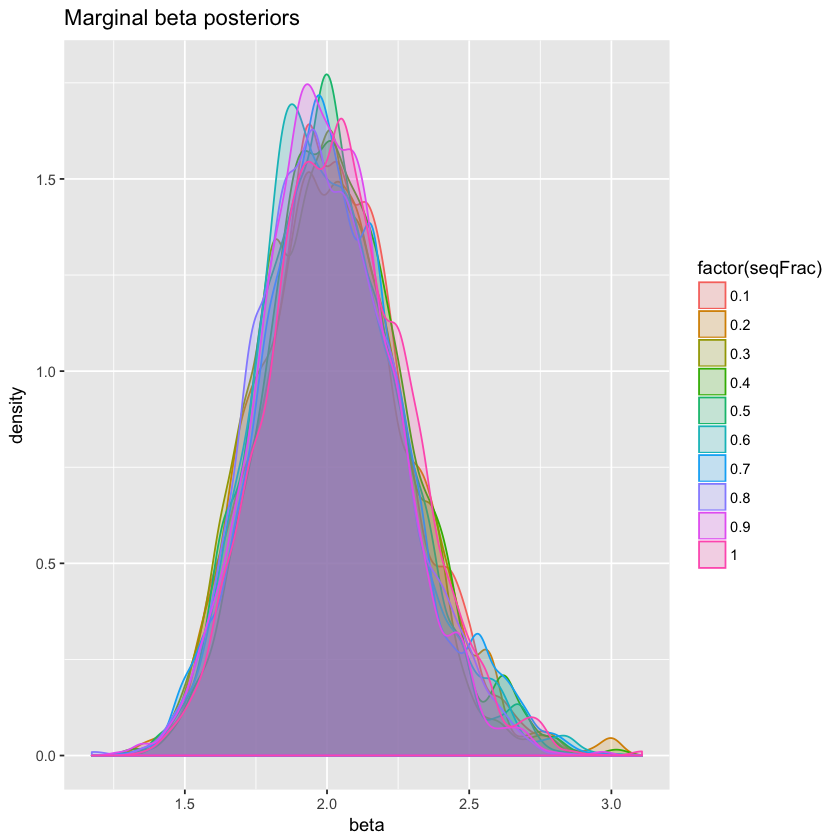

In [116]:
p1 <- ggplot(df_rhoSamp) +
    geom_density(aes(beta,
                     colour=factor(seqFrac),
                     fill=factor(seqFrac)),
                 alpha=0.2) +
    labs(title="Marginal beta posteriors")
print(p1)

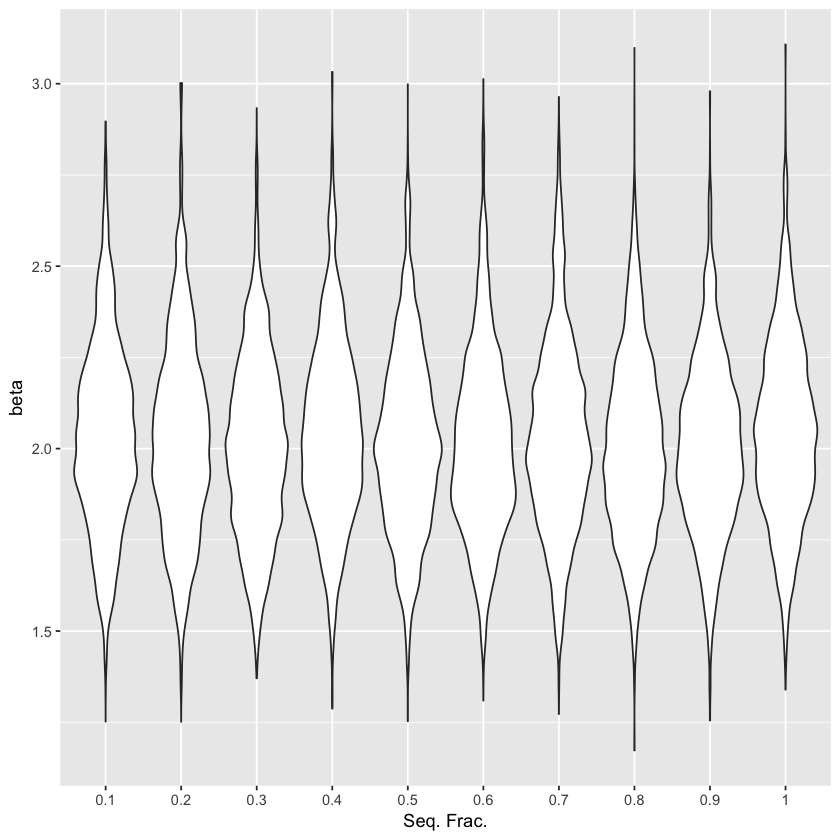

In [117]:
p2 <- ggplot(df_rhoSamp) + geom_violin(aes(factor(seqFrac), beta)) +
    labs(x="Seq. Frac.")
print(p2)

Saving 7 x 7 in image


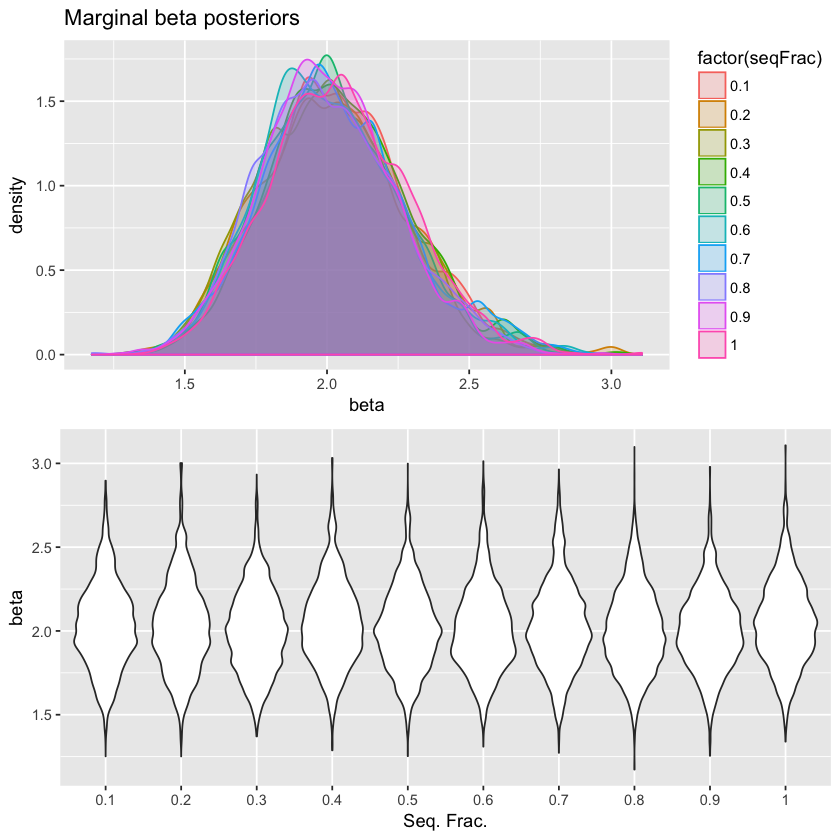

In [118]:
require(gridExtra)
p <- grid.arrange(p1, p2, ncol=1)
ggsave("validation_results_rhoSamp.png", p)